1 0.96
2 0.9466666666666665
3 0.9666666666666668
4 0.9733333333333334
5 0.9733333333333334
6 0.9800000000000001
7 0.9800000000000001
8 0.9666666666666668
9 0.9733333333333334
10 0.9800000000000001
11 0.9800000000000001
12 0.9800000000000001
13 0.9733333333333334
14 0.9666666666666666
15 0.9666666666666668
16 0.9666666666666668
17 0.9666666666666668
18 0.9666666666666666
19 0.9666666666666668
20 0.96


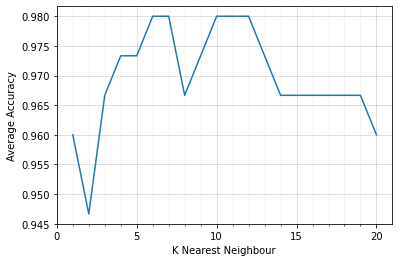

In [3]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

# Method to read data to create the data sets
def load_data():
    # Gets the data back
    url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
    df = pd.read_csv(url, header=None)
    array = df.to_numpy()
    # X Feature array and Y Target array
    X = array[:, :-1]
    Y = array[:, -1]
    le = preprocessing.LabelEncoder()
    le.fit(Y)
    nY = le.transform(Y)
    return X, Y
    

# Method that trains dataset
def train_validate(X, Y, k):
    # Creates the KNN model
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    #validates test whether the model can generalise over the whole dataset
    cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
    #averages the scores
    avg_scores = nm.mean(cv_scores)
    print(repr(k) + ' ' + repr(avg_scores))
    return avg_scores


# Method that creates the line graph
def plotData(X, Y):
    fig = plt.figure()
    #makes a 1 x 1 grid
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X, Y)
    major_ticks = nm.arange(0, 21, 5)
    minor_ticks = nm.arange(0, 21, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.grid(which='both', axis='y')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    fig.patch.set_alpha(0.9)
    plt.xlabel("K Nearest Neighbour")
    plt.ylabel("Average Accuracy")
    plt.show()
    

# Main method
def main():
    x, y = load_data()
    scores = []
    for k in range(1, 21):
        avg_score = train_validate(x, y, k)
        scores.append(avg_score)
    plotData(range(1, 21), scores)
        
main()